**129L Section 6B** <br>
2/13/25

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Task 1: Ito's Lemma and Stratonovich Formulation

**Part a) Conversion Formula**

### Conversion Between Itô and Stratonovich Integrals

Consider a stochastic process \( X_t \) governed by the Itô SDE:

$
dX_t = a(X_t, t) dt + b(X_t, t) dW_t.
$

where $ W_t $ is a standard Wiener process.

---

### 1. Definitions of Itô and Stratonovich Integrals

The stochastic integral of a process $ Y_t $ with respect to $ W_t $ is defined using different summation rules:

#### (a) Itô Integral (Left-Point Rule)
$
\int_0^T Y_t \, dW_t = \lim_{n \to \infty} \sum_{i=0}^{n-1} Y_{t_i} (W_{t_{i+1}} - W_{t_i}).
$
- Uses the **left-endpoint** value $ Y_{t_i} $.
- Leads to the well-known **Itô correction term** in differentiation.

#### (b) Stratonovich Integral (Mid-Point Rule)
$
\int_0^T Y_t \circ dW_t = \lim_{n \to \infty} \sum_{i=0}^{n-1} Y_{(t_i + t_{i+1})/2} (W_{t_{i+1}} - W_{t_i}).
$
- Uses the **midpoint** value $ Y_{(t_i + t_{i+1})/2} $.
- Follows the standard **rules of ordinary calculus** (chain rule applies).

---

### 2. Conversion Formula

The key relation between Itô and Stratonovich integrals is:

$$
\int_0^T Y_t \circ dW_t = \int_0^T Y_t \, dW_t + \frac{1}{2} \int_0^T \frac{dY_t}{dW_t} dt.
$$

Applying this to the SDE:

$$
dX_t = a(X_t, t) dt + b(X_t, t) dW_t,
$$

we obtain the equivalent **Stratonovich form**:

$$
dX_t = \left(a(X_t, t) - \frac{1}{2} b(X_t, t) \frac{\partial b}{\partial x} \right) dt + b(X_t, t) \circ dW_t.
$$

Here, the extra drift term $ -\frac{1}{2} b \frac{\partial b}{\partial x} $ appears due to the difference in interpretation between Itô and Stratonovich integration.

---

### 3. Summary of Conversion Rules

- **From Itô to Stratonovich:**
  $$
  dX_t = \mu dt + \sigma dW_t
  $$
  converts to:
  $$
  dX_t = \left( \mu + \frac{1}{2} \sigma \frac{\partial \sigma}{\partial x} \right) dt + \sigma \circ dW_t.
  $$

- **From Stratonovich to Itô:**
  $$
  dX_t = \tilde{\mu} dt + \sigma \circ dW_t
  $$
  converts to:
  $$
  dX_t = \left( \tilde{\mu} - \frac{1}{2} \sigma \frac{\partial \sigma}{\partial x} \right) dt + \sigma dW_t.
  $$

**Part b) Geometric Brownian Motion**

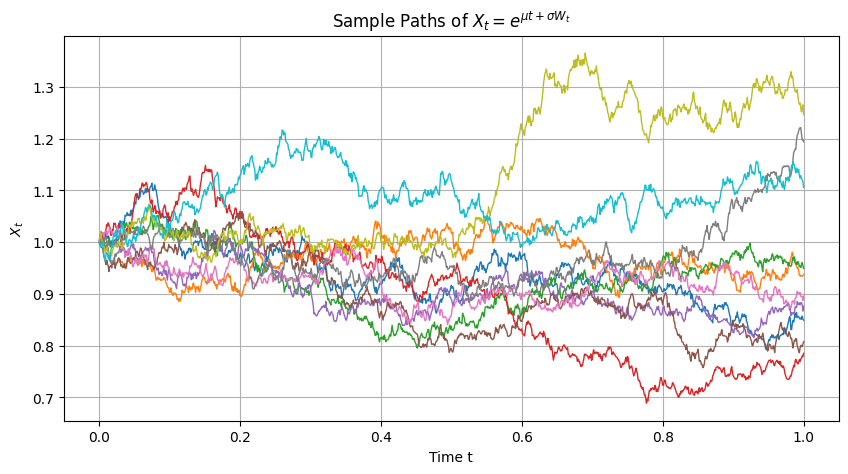

In [15]:
# Parameters
mu = 0.1     # Drift coefficient
sigma = 0.2  # Diffusion coefficient
T = 1.0      # Total time
N = 1000     # Number of time steps
M = 10       # Number of sample paths
dt = T / N   # Time step size

# Time array
t = np.linspace(0, T, N+1)

# Simulating Wiener process (Brownian motion)
dW = np.sqrt(dt) * np.random.randn(M, N)
W = np.cumsum(dW, axis=1)
W = np.hstack((np.zeros((M, 1)), W))  # Ensure W(0) = 0

# Compute Xt using the given SDE
Xt_ito = np.exp(mu * t + sigma * W)

# Plot sample paths
plt.figure(figsize=(10, 5))
for i in range(M):
    plt.plot(t, Xt_ito[i, :], lw=1)

plt.xlabel("Time t")
plt.ylabel("$X_t$")
plt.title("Sample Paths of $X_t = e^{\mu t + \sigma W_t}$")
plt.grid()
plt.show()

**Part c) Ito Differential Form**

### Itô Stochastic Integral for $X_t^I$

We are given the stochastic process:

$$
X_t^I = e^{\mu t + \sigma W_t}
$$

where $\mu$ and $\sigma$ are constants, and $W_t$ is a standard Wiener process.

---

### **Applying Itô's Lemma**

Using the function $f(t, W_t) = e^{\mu t + \sigma W_t}$, we apply **Itô’s Lemma**:

$$
dX_t^I = \left( \frac{\partial f}{\partial t} + \frac{1}{2} \sigma^2 \frac{\partial^2 f}{\partial W_t^2} \right) dt + \frac{\partial f}{\partial W_t} dW_t.
$$

---

### **Computing Partial Derivatives**
1. **Time derivative:**
   $$
   \frac{\partial f}{\partial t} = \mu e^{\mu t + \sigma W_t} = \mu X_t^I.
   $$

2. **First derivative with respect to $W_t$:**
   $$
   \frac{\partial f}{\partial W_t} = \sigma e^{\mu t + \sigma W_t} = \sigma X_t^I.
   $$

3. **Second derivative with respect to $W_t$:**
   $$
   \frac{\partial^2 f}{\partial W_t^2} = \sigma^2 e^{\mu t + \sigma W_t} = \sigma^2 X_t^I.
   $$

---

### **Substituting into Itô's Lemma**

$$
dX_t^I = \left( \mu X_t^I + \frac{1}{2} \sigma^2 X_t^I \right) dt + \sigma X_t^I dW_t.
$$

---

### **Final Itô Stochastic Differential Equation (SDE)**

$$
dX_t^I = X_t^I \left( \mu + \frac{1}{2} \sigma^2 \right) dt + \sigma X_t^I dW_t.
$$

This is the Itô stochastic integral representation of $X_t^I$.

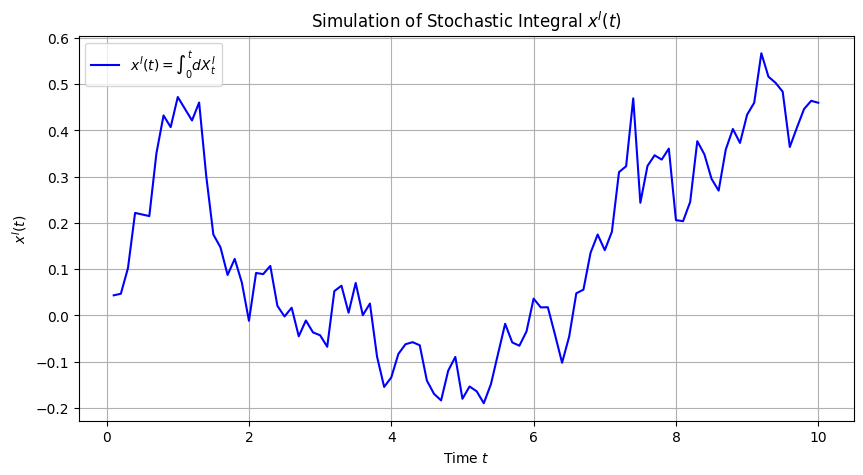

In [6]:
# Set parameters
t = 10
N = 100
dt = t / N
mu = 0.1   # Example value for mu
sigma = 0.2  # Example value for sigma

np.random.seed(42)

# Time grid
time = np.linspace(0, t, N+1)

# Initialize X_t^I with X_0 = 1
X = np.zeros(N+1)
X[0] = 1  # Initial condition

# Generate Wiener process increments (dW)
dW = np.random.normal(0, np.sqrt(dt), N)

# Simulate X_t^I using Euler-Maruyama
for i in range(1, N+1):
    dX = X[i-1] * (mu + 0.5 * sigma**2) * dt + sigma * X[i-1] * dW[i-1]
    X[i] = X[i-1] + dX

# Compute integral x^I(t) = ∫ dX_t^I using cumulative sum
x_I = np.cumsum(X[1:] - X[:-1])

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(time[1:], x_I, label=r'$x^I (t) = \int_0^t dX_t^I$', color='b')
plt.xlabel("Time $t$")
plt.ylabel(r"$x^I (t)$")
plt.title("Simulation of Stochastic Integral $x^I (t)$")
plt.legend()
plt.grid()
plt.show()

**Part d) Statanovich Differential Form**

### **Stratonovich Stochastic Integral for $X_t^I$**

The Itô stochastic differential equation (SDE) for $X_t^I$ is:

$$
dX_t^I = X_t^I \left( \mu + \frac{1}{2} \sigma^2 \right) dt + \sigma X_t^I dW_t.
$$

To express this in the **Stratonovich form**, we use the relation between Itô and Stratonovich integrals:

$$
dX_t^I = \left( \mu + \frac{1}{2} \sigma^2 \right) X_t^I dt + \sigma X_t^I \circ dW_t.
$$

where $\circ dW_t$ denotes the **Stratonovich integral**.

Since the Stratonovich integral follows the midpoint rule, the corresponding integral for $x^S (t)$ is:

$$
x^S (t) = \int_0^t dX_t^I.
$$

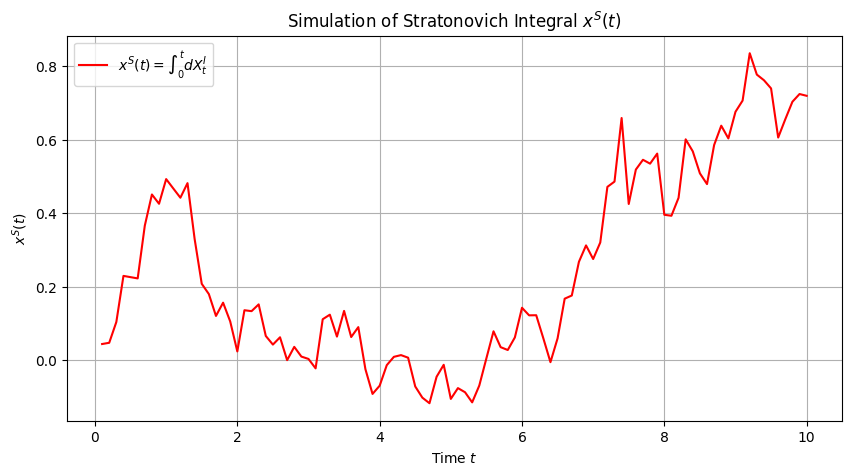

In [7]:
# Set parameters
t = 10
N = 100
dt = t / N
mu = 0.1   # Example value for mu
sigma = 0.2  # Example value for sigma

# Set random seed for reproducibility (same as Itô case)
np.random.seed(42)

# Time grid
time = np.linspace(0, t, N+1)

# Initialize X_t^I with X_0 = 1
X_S = np.zeros(N+1)
X_S[0] = 1  # Initial condition

# Generate Wiener process increments (dW)
dW = np.random.normal(0, np.sqrt(dt), N)

# Simulate X_t^I using Euler-Heun for Stratonovich integration
for i in range(1, N+1):
    X_mid = X_S[i-1] + sigma * X_S[i-1] * dW[i-1] / 2  # Midpoint value
    dX_S = X_mid * (mu + 0.5 * sigma**2) * dt + sigma * X_mid * dW[i-1]
    X_S[i] = X_S[i-1] + dX_S

# Compute integral x^S(t) = ∫ dX_t^I using cumulative sum
x_S = np.cumsum(X_S[1:] - X_S[:-1])

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(time[1:], x_S, label=r'$x^S (t) = \int_0^t dX_t^I$', color='r')
plt.xlabel("Time $t$")
plt.ylabel(r"$x^S (t)$")
plt.title("Simulation of Stratonovich Integral $x^S (t)$")
plt.legend()
plt.grid()
plt.show()

**Part e)**

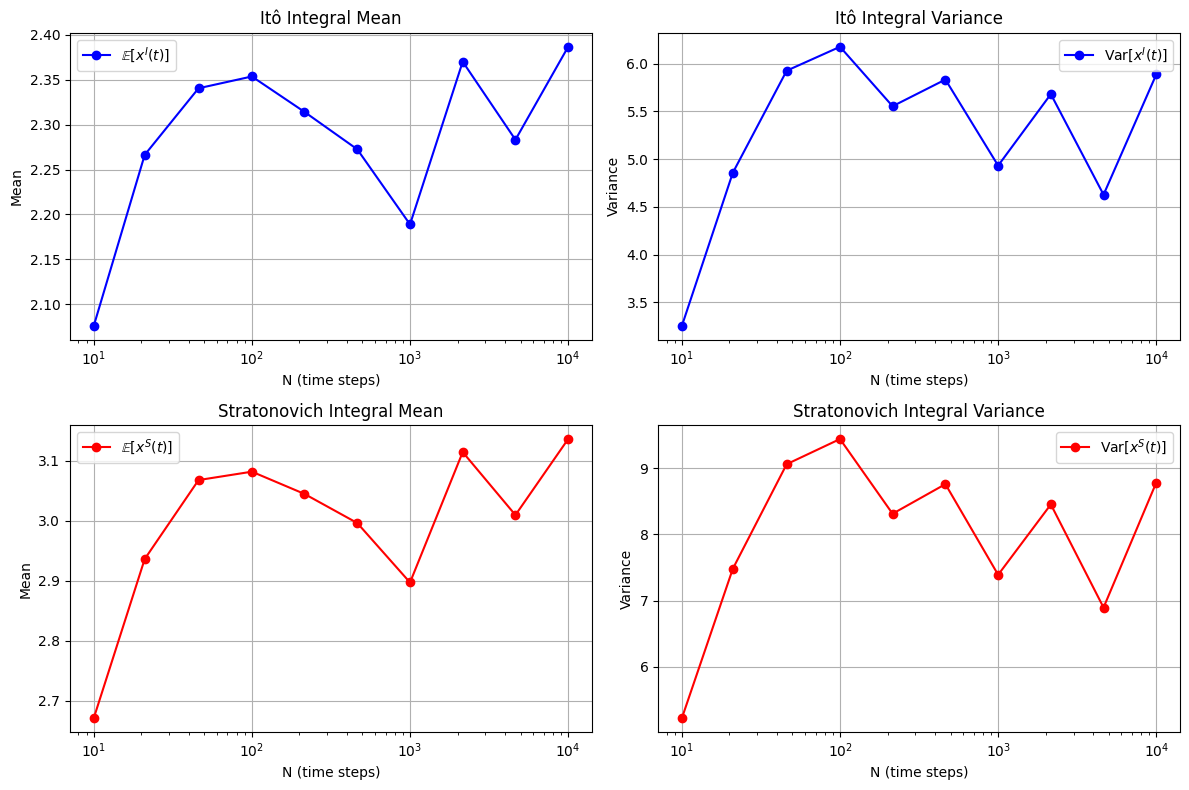

In [9]:
# Set parameters
t = 10
mu = 0.1   # Drift coefficient
sigma = 0.2  # Diffusion coefficient
num_realizations = 1000  # Number of sample trajectories

# Define log-spaced values for N
N_values = np.logspace(1, 4, num=10, dtype=int)  # 10 values from 10 to 10^4

# Store statistics
mean_XI, var_XI = [], []  # Itô mean and variance
mean_XS, var_XS = [], []  # Stratonovich mean and variance

# Set random seed for reproducibility
np.random.seed(42)

# Loop over different values of N
for N in N_values:
    dt = t / N  # Time step
    X_I_final, X_S_final = [], []  # Store final values of x^I and x^S

    # Simulate multiple trajectories
    for _ in range(num_realizations):
        dW = np.random.normal(0, np.sqrt(dt), N)  # Wiener increments

        # Itô Integration (Euler-Maruyama)
        X_I = np.ones(N+1)  # Initial condition X_0 = 1
        for i in range(1, N+1):
            dX_I = X_I[i-1] * (mu + 0.5 * sigma**2) * dt + sigma * X_I[i-1] * dW[i-1]
            X_I[i] = X_I[i-1] + dX_I
        X_I_final.append(np.sum(X_I[1:] - X_I[:-1]))  # Integral x^I (t)

        # Stratonovich Integration (Euler-Heun)
        X_S = np.ones(N+1)  # Initial condition X_0 = 1
        for i in range(1, N+1):
            X_mid = X_S[i-1] + sigma * X_S[i-1] * dW[i-1] / 2  # Midpoint
            dX_S = X_mid * (mu + 0.5 * sigma**2) * dt + sigma * X_mid * dW[i-1]
            X_S[i] = X_S[i-1] + dX_S
        X_S_final.append(np.sum(X_S[1:] - X_S[:-1]))  # Integral x^S (t)

    # Compute statistics
    mean_XI.append(np.mean(X_I_final))
    var_XI.append(np.var(X_I_final))
    mean_XS.append(np.mean(X_S_final))
    var_XS.append(np.var(X_S_final))

# Plot results
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Itô Mean
axes[0, 0].plot(N_values, mean_XI, 'o-', label=r'$\mathbb{E}[x^I(t)]$', color='b')
axes[0, 0].set_xscale("log")
axes[0, 0].set_xlabel("N (time steps)")
axes[0, 0].set_ylabel("Mean")
axes[0, 0].set_title("Itô Integral Mean")
axes[0, 0].grid(True)
axes[0, 0].legend()

# Itô Variance
axes[0, 1].plot(N_values, var_XI, 'o-', label=r'$\mathrm{Var}[x^I(t)]$', color='b')
axes[0, 1].set_xscale("log")
axes[0, 1].set_xlabel("N (time steps)")
axes[0, 1].set_ylabel("Variance")
axes[0, 1].set_title("Itô Integral Variance")
axes[0, 1].grid(True)
axes[0, 1].legend()

# Stratonovich Mean
axes[1, 0].plot(N_values, mean_XS, 'o-', label=r'$\mathbb{E}[x^S(t)]$', color='r')
axes[1, 0].set_xscale("log")
axes[1, 0].set_xlabel("N (time steps)")
axes[1, 0].set_ylabel("Mean")
axes[1, 0].set_title("Stratonovich Integral Mean")
axes[1, 0].grid(True)
axes[1, 0].legend()

# Stratonovich Variance
axes[1, 1].plot(N_values, var_XS, 'o-', label=r'$\mathrm{Var}[x^S(t)]$', color='r')
axes[1, 1].set_xscale("log")
axes[1, 1].set_xlabel("N (time steps)")
axes[1, 1].set_ylabel("Variance")
axes[1, 1].set_title("Stratonovich Integral Variance")
axes[1, 1].grid(True)
axes[1, 1].legend()

plt.tight_layout()
plt.show()

**Part f) Functional Dynamics on Geometric Brownian Motion**

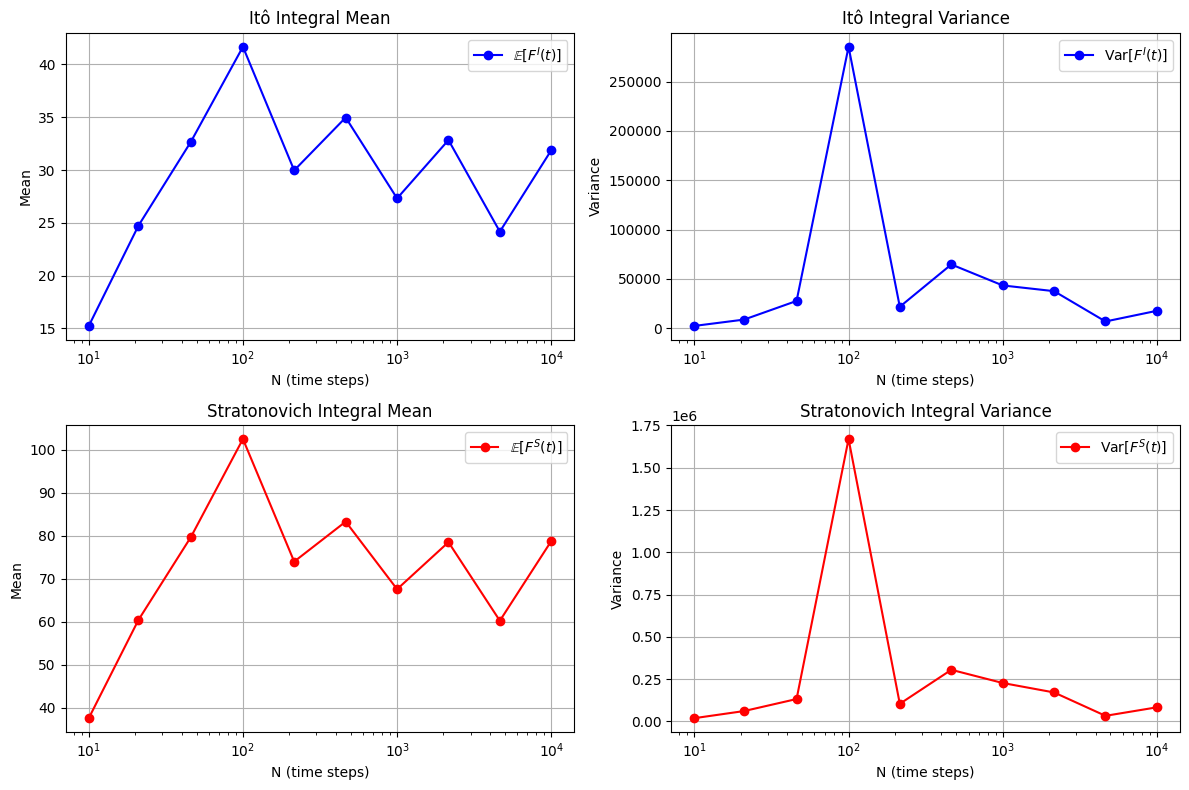

In [10]:
# Parameters
t = 10
mu = 0.1
sigma = 0.2
num_realizations = 1000

# Log-spaced values of N
N_values = np.logspace(1, 4, num=10, dtype=int)

# Store statistics
mean_FI, var_FI = [], []  # Itô integral statistics
mean_FS, var_FS = [], []  # Stratonovich integral statistics

# Set random seed for reproducibility
np.random.seed(42)

for N in N_values:
    dt = t / N
    FI_final, FS_final = [], []

    for _ in range(num_realizations):
        dW = np.random.normal(0, np.sqrt(dt), N)

        # Itô Integration (Euler-Maruyama)
        X_I = np.ones(N+1)
        FI = np.zeros(N+1)

        for i in range(1, N+1):
            dX_I = X_I[i-1] * (mu + 0.5 * sigma**2) * dt + sigma * X_I[i-1] * dW[i-1]
            X_I[i] = X_I[i-1] + dX_I
            FI[i] = FI[i-1] + X_I[i-1]**2 * dX_I  # Itô Integral

        FI_final.append(FI[-1])

        # Stratonovich Integration (Euler-Heun)
        X_S = np.ones(N+1)
        FS = np.zeros(N+1)

        for i in range(1, N+1):
            X_mid = X_S[i-1] + sigma * X_S[i-1] * dW[i-1] / 2
            dX_S = X_mid * (mu + 0.5 * sigma**2) * dt + sigma * X_mid * dW[i-1]
            X_S[i] = X_S[i-1] + dX_S
            FS[i] = FS[i-1] + X_mid**2 * dX_S  # Stratonovich Integral

        FS_final.append(FS[-1])

    # Compute statistics
    mean_FI.append(np.mean(FI_final))
    var_FI.append(np.var(FI_final))
    mean_FS.append(np.mean(FS_final))
    var_FS.append(np.var(FS_final))

# Plot results
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Itô Integral Mean
axes[0, 0].plot(N_values, mean_FI, 'o-', label=r'$\mathbb{E}[F^I(t)]$', color='b')
axes[0, 0].set_xscale("log")
axes[0, 0].set_xlabel("N (time steps)")
axes[0, 0].set_ylabel("Mean")
axes[0, 0].set_title("Itô Integral Mean")
axes[0, 0].grid(True)
axes[0, 0].legend()

# Itô Integral Variance
axes[0, 1].plot(N_values, var_FI, 'o-', label=r'$\mathrm{Var}[F^I(t)]$', color='b')
axes[0, 1].set_xscale("log")
axes[0, 1].set_xlabel("N (time steps)")
axes[0, 1].set_ylabel("Variance")
axes[0, 1].set_title("Itô Integral Variance")
axes[0, 1].grid(True)
axes[0, 1].legend()

# Stratonovich Integral Mean
axes[1, 0].plot(N_values, mean_FS, 'o-', label=r'$\mathbb{E}[F^S(t)]$', color='r')
axes[1, 0].set_xscale("log")
axes[1, 0].set_xlabel("N (time steps)")
axes[1, 0].set_ylabel("Mean")
axes[1, 0].set_title("Stratonovich Integral Mean")
axes[1, 0].grid(True)
axes[1, 0].legend()

# Stratonovich Integral Variance
axes[1, 1].plot(N_values, var_FS, 'o-', label=r'$\mathrm{Var}[F^S(t)]$', color='r')
axes[1, 1].set_xscale("log")
axes[1, 1].set_xlabel("N (time steps)")
axes[1, 1].set_ylabel("Variance")
axes[1, 1].set_title("Stratonovich Integral Variance")
axes[1, 1].grid(True)
axes[1, 1].legend()

plt.tight_layout()
plt.show()

**Part g) Autocorrelation**

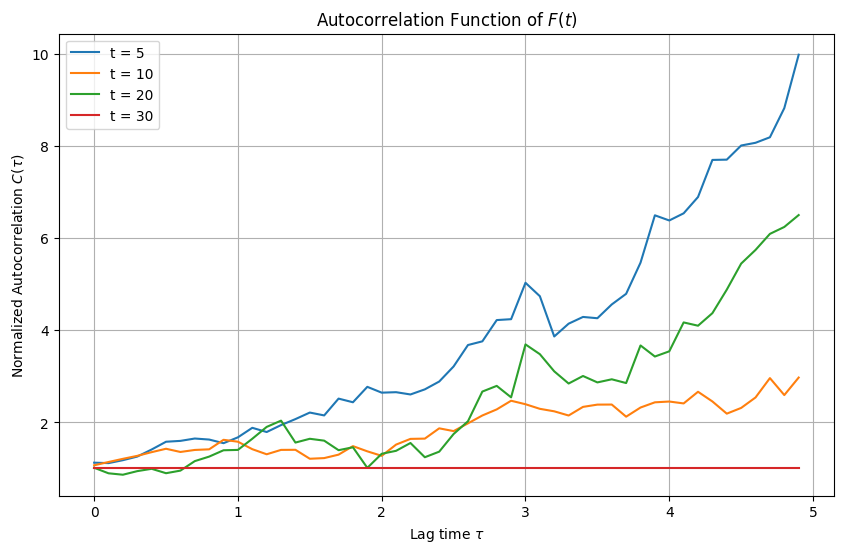

In [13]:
# Parameters
t_max = 30  # Maximum simulation time
dt = 0.1  # Time step
N = int(t_max / dt)  # Total number of time steps
mu, sigma = 0.1, 0.2  # Drift and diffusion parameters
num_realizations = 1000  # Number of stochastic realizations

# Stopping times and lag parameters
stopping_times = [5, 10, 20, 30]
tau_max = 5  # Maximum time lag
tau_steps = int(tau_max / dt)  # Number of tau steps

# Set random seed for reproducibility
np.random.seed(42)

# Store F(t) trajectories
F_realizations = np.zeros((num_realizations, N))

for i in range(num_realizations):
    dW = np.random.normal(0, np.sqrt(dt), N)
    X_t = np.ones(N)  # Initialize X_t at t=0
    F_t = np.zeros(N)  # Initialize F_t at t=0

    for j in range(1, N):
        dX = X_t[j-1] * (mu + 0.5 * sigma**2) * dt + sigma * X_t[j-1] * dW[j-1]
        X_t[j] = X_t[j-1] + dX
        F_t[j] = F_t[j-1] + X_t[j-1]**2 * dX  # Stochastic integral

    F_realizations[i, :] = F_t  # Store trajectory

# Compute the autocorrelation function for different stopping times
fig, ax = plt.subplots(figsize=(10, 6))

for t_stop in stopping_times:
    t_index = min(int(t_stop / dt), N-1)  # Ensure within bounds
    C_tau = np.zeros(tau_steps)
    
    for tau in range(tau_steps):
        t_lag_index = min(t_index + tau, N-1)  # Ensure within bounds
        valid_realizations = F_realizations[:, t_index] * F_realizations[:, t_lag_index]
        C_tau[tau] = np.mean(valid_realizations)  # Ensemble average

    # Normalize by variance to prevent numerical issues (avoid division by zero)
    var_F = np.var(F_realizations[:, t_index])
    if var_F > 1e-10:  # Small threshold to avoid divide-by-zero
        C_tau /= var_F

    tau_values = np.arange(0, tau_max, dt)
    ax.plot(tau_values[:tau_steps], C_tau, label=f"t = {t_stop}")

ax.set_xlabel(r"Lag time $\tau$")
ax.set_ylabel(r"Normalized Autocorrelation $C(\tau)$")
ax.set_title("Autocorrelation Function of $F(t)$")
ax.legend()
ax.grid()
plt.show()

# Task 2: Langevin Equation

### Solution to the Langevin Equation

We want to solve the stochastic differential equation (SDE):

$$dv(t) = -\gamma v(t)\,dt + \sqrt{2D}\,dW(t)$$
with the initial condition $v(0) = v_0$.

#### Step 1: Solve the Homogeneous Part

The deterministic part of the equation (without noise) is:

$$dv(t) = -\gamma v(t)\,dt$$
Its solution is:

$$v_h(t) = v_0 e^{-\gamma t}$$

#### Step 2: Solve the Inhomogeneous Part

Now we incorporate the noise term:

$$v(t) = v_h(t) + \int_0^t e^{-\gamma(t-s)}\sqrt{2D}\,dW(s)$$

Using the properties of the Ito integral, the full solution is:

$$v(t) = v_0 e^{-\gamma t} + \sqrt{2D}\int_0^t e^{-\gamma(t-s)}\,dW(s)$$

#### Step 3: Compute the Mean

Take the expectation:

$$\mathbb{E}[v(t)] = \mathbb{E}[v_0 e^{-\gamma t}] + \sqrt{2D}\mathbb{E}\left[\int_0^t e^{-\gamma(t-s)}\,dW(s)\right]$$

Since the expectation of the Ito integral is zero:

$$\mathbb{E}[v(t)] = v_0 e^{-\gamma t}$$

#### Step 4: Compute the Variance

The variance is given by:

$$\text{Var}[v(t)] = \mathbb{E}[v(t)^2] - \left(\mathbb{E}[v(t)]\right)^2$$

Compute the second moment:

$$\mathbb{E}[v(t)^2] = \mathbb{E}\left[\left(v_0 e^{-\gamma t} + \sqrt{2D}\int_0^t e^{-\gamma(t-s)}\,dW(s)\right)^2\right]$$

Expanding and using Ito isometry:

$$\mathbb{E}[v(t)^2] = v_0^2 e^{-2\gamma t} + 2D\int_0^t e^{-2\gamma(t-s)}\,ds$$

Evaluate the integral:

$$\int_0^t e^{-2\gamma(t-s)}\,ds = \frac{1 - e^{-2\gamma t}}{2\gamma}$$

So:

$$\mathbb{E}[v(t)^2] = v_0^2 e^{-2\gamma t} + \frac{D}{\gamma}\left(1 - e^{-2\gamma t}\right)$$

Thus the variance is:

$$\text{Var}[v(t)] = \frac{D}{\gamma}\left(1 - e^{-2\gamma t}\right)$$

### Final Answers

- **Velocity Solution:**

$$v(t) = v_0 e^{-\gamma t} + \sqrt{2D}\int_0^t e^{-\gamma(t-s)}\,dW(s)$$

- **Mean:**

$$\mathbb{E}[v(t)] = v_0 e^{-\gamma t}$$

- **Variance:**

$$\text{Var}[v(t)] = \frac{D}{\gamma}\left(1 - e^{-2\gamma t}\right)$$


As $t \to \infty$, the mean decays to zero, and the variance approaches the stationary value $\frac{D}{\gamma}$.

